In [1]:
import wg1template
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

import wg1template.histogram_plots as wg1
import wg1template.point_plots as points
from wg1template.plot_style import TangoColors
from wg1template.plot_utilities import export

import pandas as pd
from root_pandas import read_root
import math

Welcome to JupyROOT 6.20/04


In [2]:
#sig = read_root('sig_best.root')
#bkg = read_root('bkg_best.root')

In [2]:
sig = read_root('merged_precut_final_sig.root')
uu = read_root('merged_precut_final_uu.root')
dd = read_root('merged_precut_final_dd.root')
ss = read_root('merged_precut_final_ss.root')
cc = read_root('merged_precut_final_cc.root')
charged = read_root('merged_precut_final_charged.root')
mixed = read_root('merged_precut_final_mixed.root')

In [3]:
frames = [uu, dd, ss, cc, charged, mixed]
bkg = pd.concat(frames, keys=['uu', 'dd', 'ss', 'cc', 'charged', 'mixed'])

In [4]:
print(uu.columns.values)

['__experiment__' '__run__' '__event__' '__candidate__' '__ncandidates__'
 '__weight__' 'M' 'Mbc' 'E' 'p' 'useCMSFrame__bop__bc' 'deltaE'
 'roeE__bo__bc' 'roeM__bo__bc' 'roeP__bo__bc' 'roeMbc__bo__bc'
 'roeDeltae__bo__bc' 'roeEextra__bo__bc' 'roeNeextra__bo__bc' 'mcErrors'
 'mcPDG' 'isNotContinuumEvent' 'isSignal' 'isSignalAcceptMissingNeutrino'
 'SigProb' 'nTracks' 'nROE_Tracks__bo__bc' 'nROE_Charged__bo__bc'
 'nROE_RemainingTracks' 'nROE_ECLClusters__bo__bc' 'nROE_KLMClusters'
 'clusterE' 'clusterPhi' 'R2' 'thrustBm' 'thrustOm' 'cosTBTO' 'cosTBz'
 'KSFWVariables__bohso00__bc' 'KSFWVariables__bohso01__bc'
 'KSFWVariables__bohso02__bc' 'KSFWVariables__bohso03__bc'
 'KSFWVariables__bohso04__bc' 'KSFWVariables__bohso10__bc'
 'KSFWVariables__bohso12__bc' 'KSFWVariables__bohso14__bc'
 'KSFWVariables__bohso20__bc' 'KSFWVariables__bohso22__bc'
 'KSFWVariables__bohso24__bc' 'KSFWVariables__bohoo0__bc'
 'KSFWVariables__bohoo1__bc' 'KSFWVariables__bohoo2__bc'
 'KSFWVariables__bohoo3__bc' 'KSFWV

In [7]:
sig['isNotContinuumEvent']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
47285    1.0
47286    1.0
47287    1.0
47288    1.0
47289    1.0
Name: isNotContinuumEvent, Length: 47290, dtype: float64

In [31]:
sig['isSignal']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
47285   NaN
47286   NaN
47287   NaN
47288   NaN
47289   NaN
Name: isSignal, Length: 47290, dtype: float64

In [8]:
sig['isNotContinuumEvent'].value_counts() 

1.0    47290
Name: isNotContinuumEvent, dtype: int64

In [13]:
mixed['isNotContinuumEvent'].value_counts() 

1.0    80718
Name: isNotContinuumEvent, dtype: int64

In [9]:
sig['isSignal'].value_counts() 

Series([], Name: isSignal, dtype: int64)

In [11]:
sig['Btag_d1_isSignal'].value_counts() 

0.0    23370
1.0    14675
Name: Btag_d1_isSignal, dtype: int64

In [12]:
sig['Bsig_d0_isSignal'].value_counts() 

1.0    46746
0.0      371
Name: Bsig_d0_isSignal, dtype: int64

In [10]:
sig_1 = sig.query("Bsig_d0_isSignal > 0.5") #& Btag_d1_isSignal > 0.5
len(sig_1)

46746

In [6]:
print(uu.columns.values)

['__experiment__' '__run__' '__event__' '__candidate__' '__ncandidates__'
 '__weight__' 'M' 'Mbc' 'E' 'p' 'useCMSFrame__bop__bc' 'deltaE'
 'roeE__bo__bc' 'roeM__bo__bc' 'roeP__bo__bc' 'roeMbc__bo__bc'
 'roeDeltae__bo__bc' 'roeEextra__bo__bc' 'roeNeextra__bo__bc' 'mcErrors'
 'mcPDG' 'isNotContinuumEvent' 'isSignal' 'isSignalAcceptMissingNeutrino'
 'SigProb' 'nTracks' 'nROE_Tracks__bo__bc' 'nROE_Charged__bo__bc'
 'nROE_RemainingTracks' 'nROE_ECLClusters__bo__bc' 'nROE_KLMClusters'
 'clusterE' 'clusterPhi' 'R2' 'thrustBm' 'thrustOm' 'cosTBTO' 'cosTBz'
 'KSFWVariables__bohso00__bc' 'KSFWVariables__bohso01__bc'
 'KSFWVariables__bohso02__bc' 'KSFWVariables__bohso03__bc'
 'KSFWVariables__bohso04__bc' 'KSFWVariables__bohso10__bc'
 'KSFWVariables__bohso12__bc' 'KSFWVariables__bohso14__bc'
 'KSFWVariables__bohso20__bc' 'KSFWVariables__bohso22__bc'
 'KSFWVariables__bohso24__bc' 'KSFWVariables__bohoo0__bc'
 'KSFWVariables__bohoo1__bc' 'KSFWVariables__bohoo2__bc'
 'KSFWVariables__bohoo3__bc' 'KSFWV

/afs/desy.de/user/j/jjjy213/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


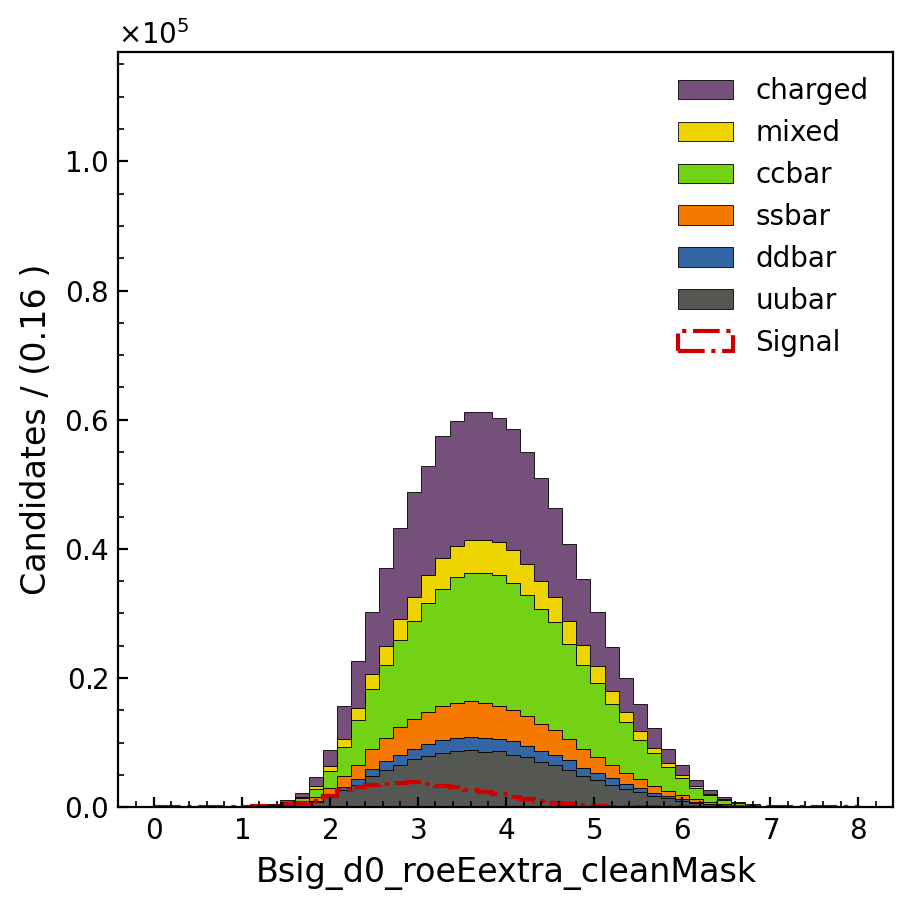

In [22]:
var1 = wg1.HistVariable("Bsig_d0_roeEextra_cleanMask",
                             n_bins=50,
                             scope=(0, 8),
                             var_name="Bsig_d0_roeEextra_cleanMask")


hp1 = wg1.StackedHistogramPlot(var1)
hp1.add_component("uubar", uu, weights=uu.__weight__, color=TangoColors.slate,
                  comp_type='stacked')
hp1.add_component("ddbar", dd, weights=dd.__weight__, color=TangoColors.sky_blue,
                  comp_type='stacked')
hp1.add_component("ssbar", ss, weights=ss.__weight__, color=TangoColors.orange,
                  comp_type='stacked')
hp1.add_component("ccbar", cc, weights=cc.__weight__, color=TangoColors.chameleon,
                  comp_type='stacked')
#hp1.add_component("taupair", tau, weights=tau.__weight__, color=TangoColors.aluminium,
#                  comp_type='stacked')
hp1.add_component("mixed", mixed, weights=mixed.__weight__, color=TangoColors.butter,
                  comp_type='stacked')
hp1.add_component("charged", charged, weights=charged.__weight__, color=TangoColors.plum,
                  comp_type='stacked')

hp2 = wg1.SimpleHistogramPlot(var1)
hp2.add_component("Signal", sig, weights=sig.__weight__ ,
                  color=TangoColors.scarlet_red, ls='-.')

fig, ax = wg1.create_solo_figure()
hp1.plot_on(ax, ylabel="Candidates")
hp2.plot_on(ax, hide_labels=True)  # Hide labels to prevent overrides)

plt.show()
export(fig, 'combo', 'examples')
plt.close()

/afs/desy.de/user/j/jjjy213/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


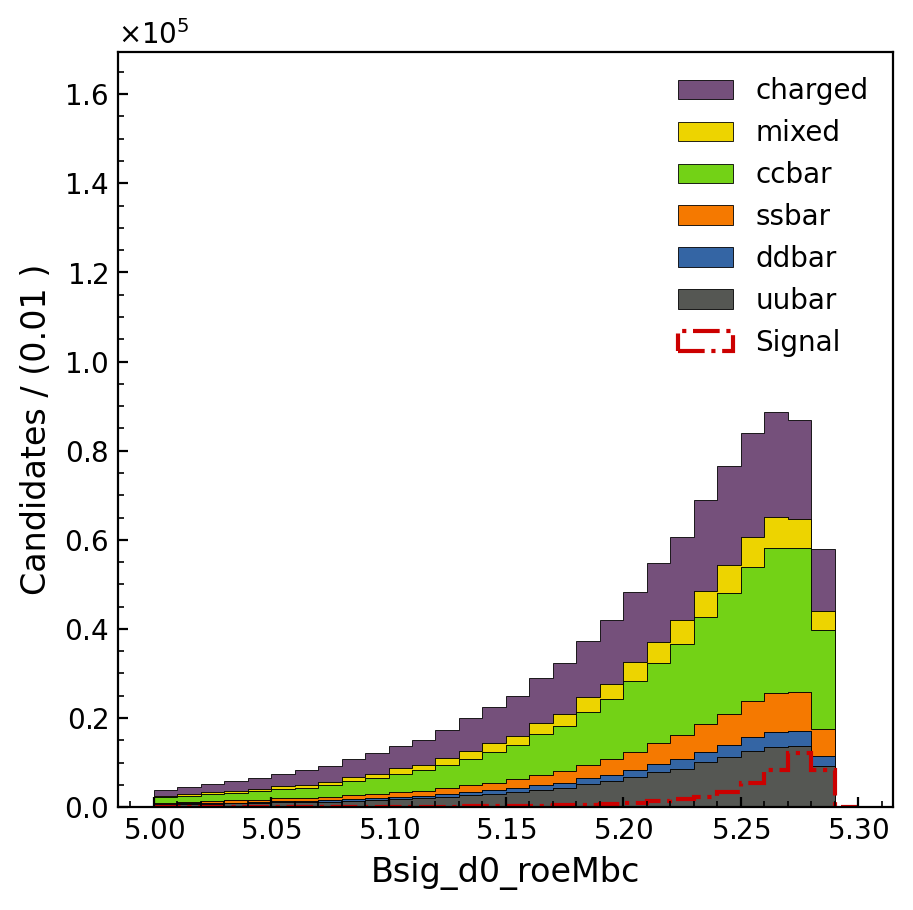

In [14]:

var1 = wg1.HistVariable("Bsig_d0_roeMbc",
                             n_bins=30,
                             scope=(5, 5.3),
                             var_name="Bsig_d0_roeMbc")


hp1 = wg1.StackedHistogramPlot(var1)
hp1.add_component("uubar", uu, weights=uu.__weight__, color=TangoColors.slate,
                  comp_type='stacked')
hp1.add_component("ddbar", dd, weights=dd.__weight__, color=TangoColors.sky_blue,
                  comp_type='stacked')
hp1.add_component("ssbar", ss, weights=ss.__weight__, color=TangoColors.orange,
                  comp_type='stacked')
hp1.add_component("ccbar", cc, weights=cc.__weight__, color=TangoColors.chameleon,
                  comp_type='stacked')
#hp1.add_component("taupair", tau, weights=tau.__weight__, color=TangoColors.aluminium,
#                  comp_type='stacked')
hp1.add_component("mixed", mixed, weights=mixed.__weight__, color=TangoColors.butter,
                  comp_type='stacked')
hp1.add_component("charged", charged, weights=charged.__weight__, color=TangoColors.plum,
                  comp_type='stacked')

hp2 = wg1.SimpleHistogramPlot(var1)
hp2.add_component("Signal", sig, weights=sig.__weight__ ,
                  color=TangoColors.scarlet_red, ls='-.')

fig, ax = wg1.create_solo_figure()
hp1.plot_on(ax, ylabel="Candidates")
hp2.plot_on(ax, hide_labels=True)  # Hide labels to prevent overrides)

plt.show()
export(fig, 'combo', 'examples')
plt.close()

/afs/desy.de/user/j/jjjy213/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


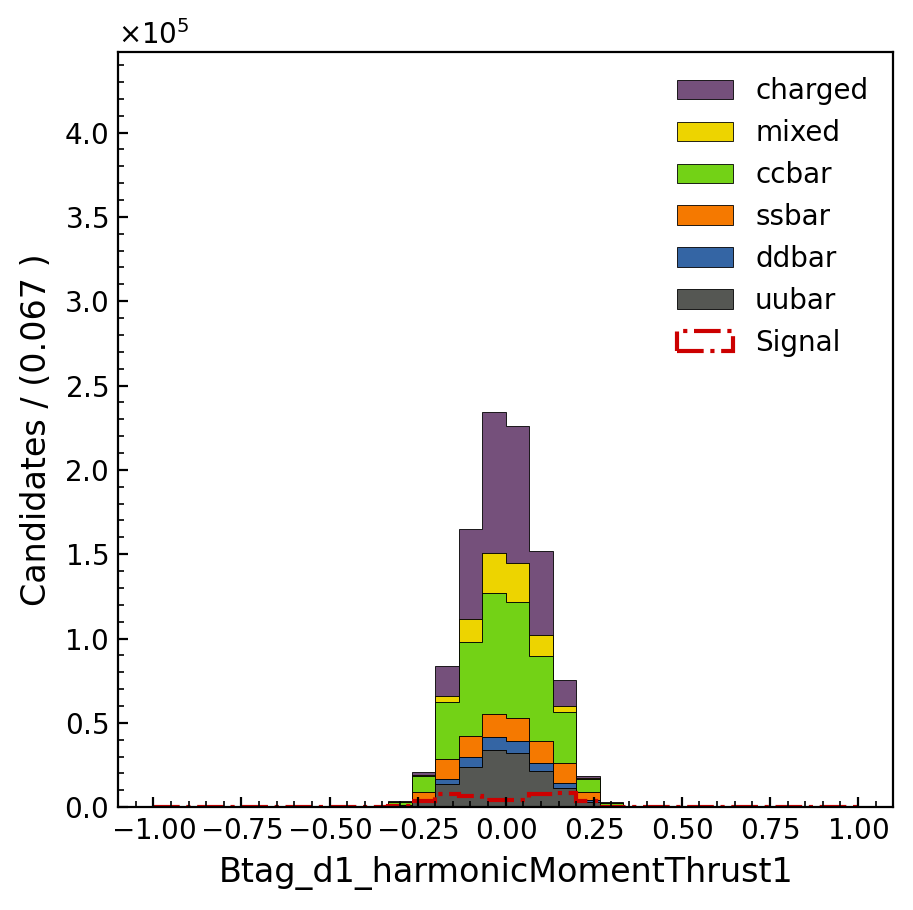

In [27]:

var1 = wg1.HistVariable("Btag_d1_harmonicMomentThrust1",
                             n_bins=30,
                             scope=(-1, 1),
                             var_name="Btag_d1_harmonicMomentThrust1")


hp1 = wg1.StackedHistogramPlot(var1)
hp1.add_component("uubar", uu, weights=uu.__weight__, color=TangoColors.slate,
                  comp_type='stacked')
hp1.add_component("ddbar", dd, weights=dd.__weight__, color=TangoColors.sky_blue,
                  comp_type='stacked')
hp1.add_component("ssbar", ss, weights=ss.__weight__, color=TangoColors.orange,
                  comp_type='stacked')
hp1.add_component("ccbar", cc, weights=cc.__weight__, color=TangoColors.chameleon,
                  comp_type='stacked')
#hp1.add_component("taupair", tau, weights=tau.__weight__, color=TangoColors.aluminium,
#                  comp_type='stacked')
hp1.add_component("mixed", mixed, weights=mixed.__weight__, color=TangoColors.butter,
                  comp_type='stacked')
hp1.add_component("charged", charged, weights=charged.__weight__, color=TangoColors.plum,
                  comp_type='stacked')

hp2 = wg1.SimpleHistogramPlot(var1)
hp2.add_component("Signal", sig, weights=sig.__weight__ ,
                  color=TangoColors.scarlet_red, ls='-.')

fig, ax = wg1.create_solo_figure()
hp1.plot_on(ax, ylabel="Candidates")
hp2.plot_on(ax, hide_labels=True)  # Hide labels to prevent overrides)

plt.show()
export(fig, 'combo', 'examples')
plt.close()

/afs/desy.de/user/j/jjjy213/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


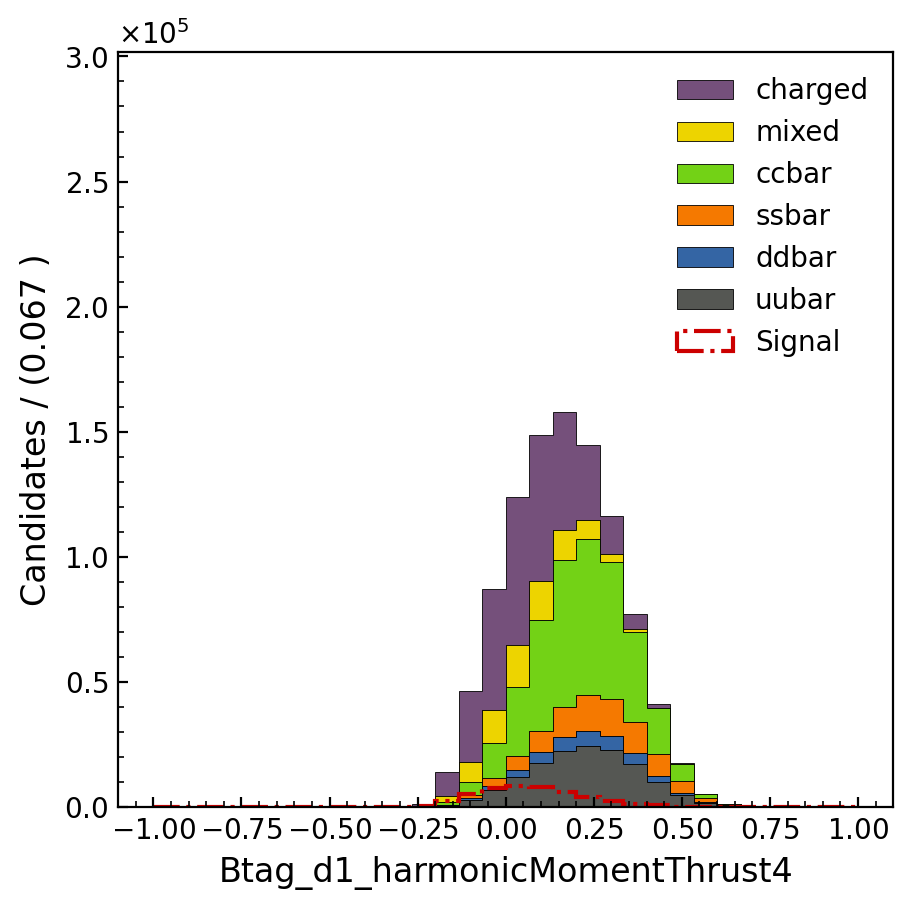

In [30]:
var1 = wg1.HistVariable("Btag_d1_harmonicMomentThrust",
                             n_bins=30,
                             scope=(-1, 1),
                             var_name="Btag_d1_harmonicMomentThrust4")


hp1 = wg1.StackedHistogramPlot(var1)
hp1.add_component("uubar", uu, weights=uu.__weight__, color=TangoColors.slate,
                  comp_type='stacked')
hp1.add_component("ddbar", dd, weights=dd.__weight__, color=TangoColors.sky_blue,
                  comp_type='stacked')
hp1.add_component("ssbar", ss, weights=ss.__weight__, color=TangoColors.orange,
                  comp_type='stacked')
hp1.add_component("ccbar", cc, weights=cc.__weight__, color=TangoColors.chameleon,
                  comp_type='stacked')
#hp1.add_component("taupair", tau, weights=tau.__weight__, color=TangoColors.aluminium,
#                  comp_type='stacked')
hp1.add_component("mixed", mixed, weights=mixed.__weight__, color=TangoColors.butter,
                  comp_type='stacked')
hp1.add_component("charged", charged, weights=charged.__weight__, color=TangoColors.plum,
                  comp_type='stacked')

hp2 = wg1.SimpleHistogramPlot(var1)
hp2.add_component("Signal", sig, weights=sig.__weight__ ,
                  color=TangoColors.scarlet_red, ls='-.')

fig, ax = wg1.create_solo_figure()
hp1.plot_on(ax, ylabel="Candidates")
hp2.plot_on(ax, hide_labels=True)  # Hide labels to prevent overrides)

plt.show()
export(fig, 'combo', 'examples')
plt.close()

/afs/desy.de/user/j/jjjy213/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


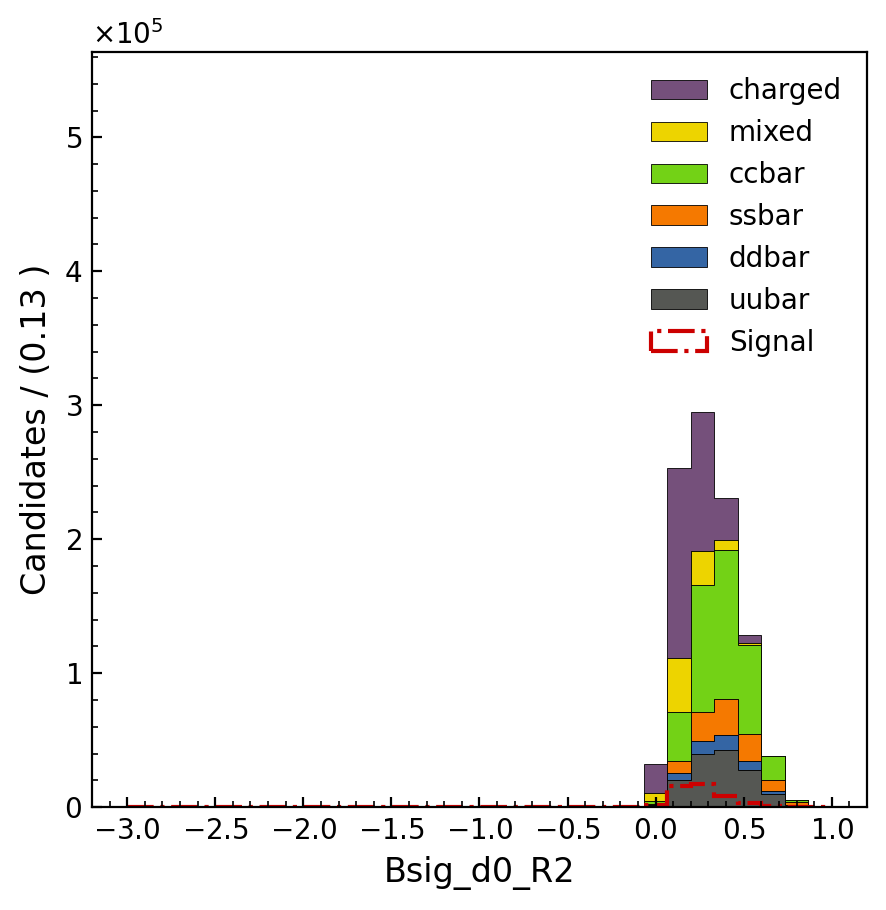

In [8]:
var1 = wg1.HistVariable("Bsig_d0_R2",
                             n_bins=30,
                             scope=(-3, 1),
                             var_name="Bsig_d0_R2")


hp1 = wg1.StackedHistogramPlot(var1)
hp1.add_component("uubar", uu, weights=uu.__weight__, color=TangoColors.slate,
                  comp_type='stacked')
hp1.add_component("ddbar", dd, weights=dd.__weight__, color=TangoColors.sky_blue,
                  comp_type='stacked')
hp1.add_component("ssbar", ss, weights=ss.__weight__, color=TangoColors.orange,
                  comp_type='stacked')
hp1.add_component("ccbar", cc, weights=cc.__weight__, color=TangoColors.chameleon,
                  comp_type='stacked')
#hp1.add_component("taupair", tau, weights=tau.__weight__, color=TangoColors.aluminium,
#                  comp_type='stacked')
hp1.add_component("mixed", mixed, weights=mixed.__weight__, color=TangoColors.butter,
                  comp_type='stacked')
hp1.add_component("charged", charged, weights=charged.__weight__, color=TangoColors.plum,
                  comp_type='stacked')

hp2 = wg1.SimpleHistogramPlot(var1)
hp2.add_component("Signal", sig, weights=sig.__weight__ ,
                  color=TangoColors.scarlet_red, ls='-.')

fig, ax = wg1.create_solo_figure()
hp1.plot_on(ax, ylabel="Candidates")
hp2.plot_on(ax, hide_labels=True)  # Hide labels to prevent overrides)

plt.show()
export(fig, 'combo', 'examples')
plt.close()

/afs/desy.de/user/j/jjjy213/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


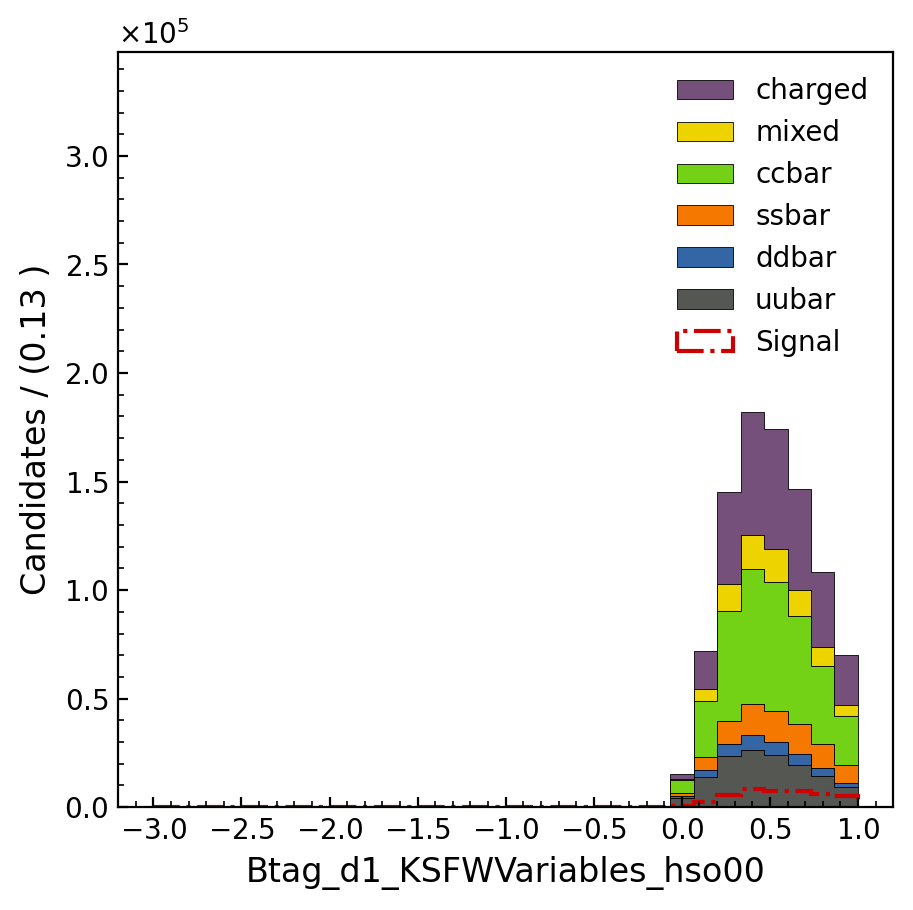

In [9]:
var1 = wg1.HistVariable("Btag_d1_KSFWVariables_hso00",
                             n_bins=30,
                             scope=(-3, 1),
                             var_name="Btag_d1_KSFWVariables_hso00")


hp1 = wg1.StackedHistogramPlot(var1)
hp1.add_component("uubar", uu, weights=uu.__weight__, color=TangoColors.slate,
                  comp_type='stacked')
hp1.add_component("ddbar", dd, weights=dd.__weight__, color=TangoColors.sky_blue,
                  comp_type='stacked')
hp1.add_component("ssbar", ss, weights=ss.__weight__, color=TangoColors.orange,
                  comp_type='stacked')
hp1.add_component("ccbar", cc, weights=cc.__weight__, color=TangoColors.chameleon,
                  comp_type='stacked')
#hp1.add_component("taupair", tau, weights=tau.__weight__, color=TangoColors.aluminium,
#                  comp_type='stacked')
hp1.add_component("mixed", mixed, weights=mixed.__weight__, color=TangoColors.butter,
                  comp_type='stacked')
hp1.add_component("charged", charged, weights=charged.__weight__, color=TangoColors.plum,
                  comp_type='stacked')

hp2 = wg1.SimpleHistogramPlot(var1)
hp2.add_component("Signal", sig, weights=sig.__weight__ ,
                  color=TangoColors.scarlet_red, ls='-.')

fig, ax = wg1.create_solo_figure()
hp1.plot_on(ax, ylabel="Candidates")
hp2.plot_on(ax, hide_labels=True)  # Hide labels to prevent overrides)

plt.show()
export(fig, 'combo', 'examples')
plt.close()

In [10]:
sig

,__experiment__,__run__,__event__,__candidate__,__ncandidates__,__weight__,M,Mbc,E,p,...,Bsig_d0_roeP_cleanMask,Bsig_d0_roeMbc_cleanMask,Bsig_d0_roeDeltae_cleanMask,Bsig_d0_roeEextra_cleanMask,Bsig_d0_roeNeextra_cleanMask,Bsig_d0_nROE_Tracks_cleanMask,Bsig_d0_nROE_Charged_cleanMask,Bsig_d0_nROE_ECLClusters_cleanMask,Btag_FEIProbabilityRank,nParticlesInList__boUpsilon__bo4S__bc__claftercut__bc
0,1003,0,8478042,0,1,1.0,7.054829,4.794375,7.382884,2.176320,...,1.796264,5.277451,-0.193478,2.237117,0.887408,4.0,4.0,9.0,1.0,1.0
1,1003,0,8478233,0,1,1.0,7.364454,4.660949,7.732060,2.355752,...,1.470823,5.271229,0.532470,2.659859,1.674774,5.0,5.0,13.0,1.0,1.0
2,1003,0,8478336,0,1,1.0,5.828386,5.196189,6.247967,2.251002,...,1.171022,5.277280,-0.550210,2.182217,0.736213,4.0,4.0,11.0,1.0,1.0
3,1003,0,8478413,0,2,1.0,6.750629,4.984207,7.641897,3.581562,...,1.655407,5.275005,0.233820,3.075575,0.677810,7.0,7.0,11.0,1.0,2.0
4,1003,0,8478413,1,2,1.0,6.630468,5.039389,7.468909,3.438239,...,1.655407,5.275005,0.233820,3.075575,0.677810,7.0,7.0,11.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47285,1003,0,26549796,1,5,1.0,7.519706,4.678238,8.596466,4.165723,...,1.917096,5.256646,0.476841,3.618187,2.081955,7.0,7.0,13.0,2.0,5.0
47286,1003,0,26549796,2,5,1.0,7.708554,4.623528,8.822190,4.290599,...,1.917096,5.256646,0.476841,3.618187,2.081955,7.0,7.0,13.0,3.0,5.0
47287,1003,0,26549796,3,5,1.0,7.635448,4.712167,8.695270,4.160247,...,1.917096,5.256646,0.476841,3.618187,2.081955,7.0,7.0,13.0,4.0,5.0
47288,1003,0,26549796,4,5,1.0,7.632900,4.706103,8.700937,4.176737,...,1.917096,5.256646,0.476841,3.618187,2.081955,7.0,7.0,13.0,5.0,5.0


In [38]:
test = read_root('test-ltmva.root')
test['isNotContinuumEvent'].value.counts()

172293    0.0
665620    1.0
409582    0.0
669739    1.0
277657    0.0
         ... 
102982    0.0
542374    1.0
196493    0.0
137145    0.0
471164    1.0
Name: isNotContinuumEvent, Length: 209843, dtype: float64

In [45]:
test['isNotContinuumEvent'].value_counts()

0.0    132029
1.0     77814
Name: isNotContinuumEvent, dtype: int64

In [46]:
test['Btag_d1_isSignal'].value_counts()

0.0    155539
1.0     16953
Name: Btag_d1_isSignal, dtype: int64

In [47]:
sig['Btag_d1_isSignal'].value_counts()

0.0    23370
1.0    14675
Name: Btag_d1_isSignal, dtype: int64

In [48]:
bkg['Btag_d1_isSignal'].value_counts()

0.0    746961
1.0     47899
Name: Btag_d1_isSignal, dtype: int64

In [42]:
test['Btag_d1_isSignal'].value.counts()
#test_cut = sig.query("Btag_d1_isSignal > 0.5")

AttributeError: 'Series' object has no attribute 'value'

In [49]:
test

,__experiment__,__run__,__event__,__candidate__,__ncandidates__,__weight__,M,Mbc,E,p,...,Bsig_d0_roeP_cleanMask,Bsig_d0_roeMbc_cleanMask,Bsig_d0_roeDeltae_cleanMask,Bsig_d0_roeEextra_cleanMask,Bsig_d0_roeNeextra_cleanMask,Bsig_d0_nROE_Tracks_cleanMask,Bsig_d0_nROE_Charged_cleanMask,Bsig_d0_nROE_ECLClusters_cleanMask,Btag_FEIProbabilityRank,nParticlesInList__boUpsilon__bo4S__bc__claftercut__bc
172293,1003,0,30005670,0,2,1.0,6.865069,4.952028,7.777123,3.654376,...,1.756760,5.240808,1.538964,3.499284,1.650346,7.0,7.0,14.0,1.0,2.0
665620,1003,0,45363390,0,6,1.0,5.902018,5.262292,6.117668,1.609983,...,1.081248,5.183198,1.761648,3.924205,3.381675,4.0,4.0,13.0,1.0,6.0
409582,1003,0,131542881,0,1,1.0,6.064625,5.177532,6.648636,2.724828,...,1.213433,5.247581,1.346514,4.547292,3.597527,5.0,5.0,20.0,1.0,1.0
669739,1003,0,23913109,0,2,1.0,5.832498,5.258970,6.205683,2.119544,...,3.140356,5.113693,1.645979,4.664781,0.958694,8.0,8.0,11.0,1.0,2.0
277657,1003,0,37997943,0,2,1.0,6.090916,5.222467,6.312614,1.658266,...,1.292709,5.275464,0.486927,3.265611,2.647610,5.0,5.0,14.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102982,1003,0,145904682,0,1,1.0,6.541145,5.165322,6.950750,2.350819,...,1.574141,5.146402,1.575579,2.475222,1.497530,4.0,4.0,12.0,1.0,1.0
542374,1003,0,12767531,0,3,1.0,7.247353,4.928633,7.851205,3.019487,...,2.274443,5.239956,0.813566,4.798383,3.247415,4.0,4.0,14.0,1.0,3.0
196493,1003,0,36276827,0,1,1.0,6.252143,5.249472,6.556925,1.975847,...,1.741567,5.264373,1.666090,5.038806,3.474400,7.0,7.0,18.0,1.0,1.0
137145,1003,0,12408887,0,2,1.0,6.749644,4.953408,7.772671,3.854442,...,2.185794,5.253081,1.742748,2.563389,1.143449,7.0,7.0,12.0,1.0,2.0


In [32]:
expert = read_root('expert_tag.root')

In [33]:
expert


,fbdt_mva__ptxml,fbdt_mva__ptxml_isNotContinuumEvent
0,0.176290,0.0
1,0.919917,1.0
2,0.098601,0.0
3,0.763868,1.0
4,0.103068,0.0
...,...,...
209838,0.209933,0.0
209839,0.102529,1.0
209840,0.360475,0.0
209841,0.038374,0.0


In [51]:
test_fbdt= pd.concat([test, expert.reindex(test.index)], axis=1)
test_fbdt

,__experiment__,__run__,__event__,__candidate__,__ncandidates__,__weight__,M,Mbc,E,p,...,Bsig_d0_roeDeltae_cleanMask,Bsig_d0_roeEextra_cleanMask,Bsig_d0_roeNeextra_cleanMask,Bsig_d0_nROE_Tracks_cleanMask,Bsig_d0_nROE_Charged_cleanMask,Bsig_d0_nROE_ECLClusters_cleanMask,Btag_FEIProbabilityRank,nParticlesInList__boUpsilon__bo4S__bc__claftercut__bc,fbdt_mva__ptxml,fbdt_mva__ptxml_isNotContinuumEvent
172293,1003,0,30005670,0,2,1.0,6.865069,4.952028,7.777123,3.654376,...,1.538964,3.499284,1.650346,7.0,7.0,14.0,1.0,2.0,0.134789,0.0
665620,1003,0,45363390,0,6,1.0,5.902018,5.262292,6.117668,1.609983,...,1.761648,3.924205,3.381675,4.0,4.0,13.0,1.0,6.0,NaN,NaN
409582,1003,0,131542881,0,1,1.0,6.064625,5.177532,6.648636,2.724828,...,1.346514,4.547292,3.597527,5.0,5.0,20.0,1.0,1.0,NaN,NaN
669739,1003,0,23913109,0,2,1.0,5.832498,5.258970,6.205683,2.119544,...,1.645979,4.664781,0.958694,8.0,8.0,11.0,1.0,2.0,NaN,NaN
277657,1003,0,37997943,0,2,1.0,6.090916,5.222467,6.312614,1.658266,...,0.486927,3.265611,2.647610,5.0,5.0,14.0,1.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102982,1003,0,145904682,0,1,1.0,6.541145,5.165322,6.950750,2.350819,...,1.575579,2.475222,1.497530,4.0,4.0,12.0,1.0,1.0,0.255238,0.0
542374,1003,0,12767531,0,3,1.0,7.247353,4.928633,7.851205,3.019487,...,0.813566,4.798383,3.247415,4.0,4.0,14.0,1.0,3.0,NaN,NaN
196493,1003,0,36276827,0,1,1.0,6.252143,5.249472,6.556925,1.975847,...,1.666090,5.038806,3.474400,7.0,7.0,18.0,1.0,1.0,0.029727,0.0
137145,1003,0,12408887,0,2,1.0,6.749644,4.953408,7.772671,3.854442,...,1.742748,2.563389,1.143449,7.0,7.0,12.0,1.0,2.0,0.567972,0.0


In [ ]:
test_fbdt = sig.query("Btag_d1_isSignal > 0.5 & ")

In [35]:
sig['isNotContinuumEvent']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
47285    1.0
47286    1.0
47287    1.0
47288    1.0
47289    1.0
Name: isNotContinuumEvent, Length: 47290, dtype: float64

In [36]:
bkg['isNotContinuumEvent']

uu     0        0.0
       1        0.0
       2        0.0
       3        0.0
       4        0.0
               ... 
mixed  80713    1.0
       80714    1.0
       80715    1.0
       80716    1.0
       80717    1.0
Name: isNotContinuumEvent, Length: 983334, dtype: float64

In [12]:
purity = len(sig) / (len(sig) + len(bkg))
purity

0.04588482317508616

/afs/desy.de/user/j/jjjy213/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


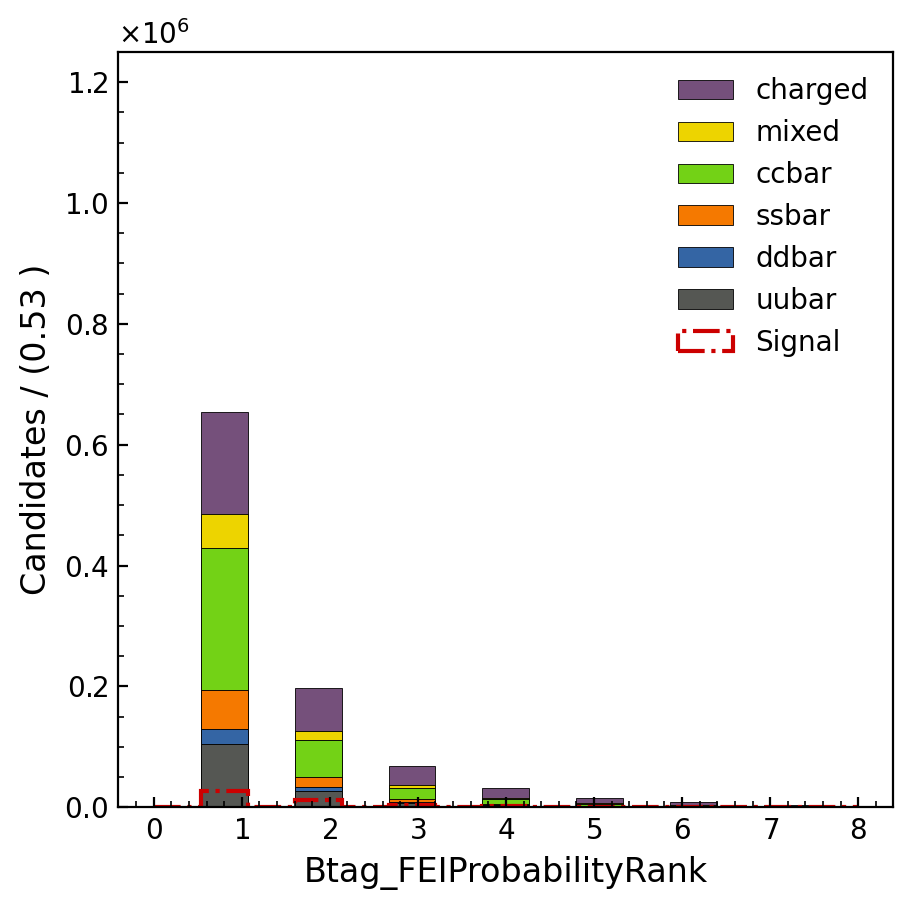

In [13]:
var1 = wg1.HistVariable("Btag_FEIProbabilityRank",
                             n_bins=15,
                             scope=(0, 8),
                             var_name="Btag_FEIProbabilityRank")


hp1 = wg1.StackedHistogramPlot(var1)
hp1.add_component("uubar", uu, weights=uu.__weight__, color=TangoColors.slate,
                  comp_type='stacked')
hp1.add_component("ddbar", dd, weights=dd.__weight__, color=TangoColors.sky_blue,
                  comp_type='stacked')
hp1.add_component("ssbar", ss, weights=ss.__weight__, color=TangoColors.orange,
                  comp_type='stacked')
hp1.add_component("ccbar", cc, weights=cc.__weight__, color=TangoColors.chameleon,
                  comp_type='stacked')
#hp1.add_component("taupair", tau, weights=tau.__weight__, color=TangoColors.aluminium,
#                  comp_type='stacked')
hp1.add_component("mixed", mixed, weights=mixed.__weight__, color=TangoColors.butter,
                  comp_type='stacked')
hp1.add_component("charged", charged, weights=charged.__weight__, color=TangoColors.plum,
                  comp_type='stacked')

hp2 = wg1.SimpleHistogramPlot(var1)
hp2.add_component("Signal", sig, weights=sig.__weight__ ,
                  color=TangoColors.scarlet_red, ls='-.')

fig, ax = wg1.create_solo_figure()
hp1.plot_on(ax, ylabel="Candidates")
hp2.plot_on(ax, hide_labels=True)  # Hide labels to prevent overrides)

plt.show()
export(fig, 'combo', 'examples')
plt.close()

/afs/desy.de/user/j/jjjy213/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


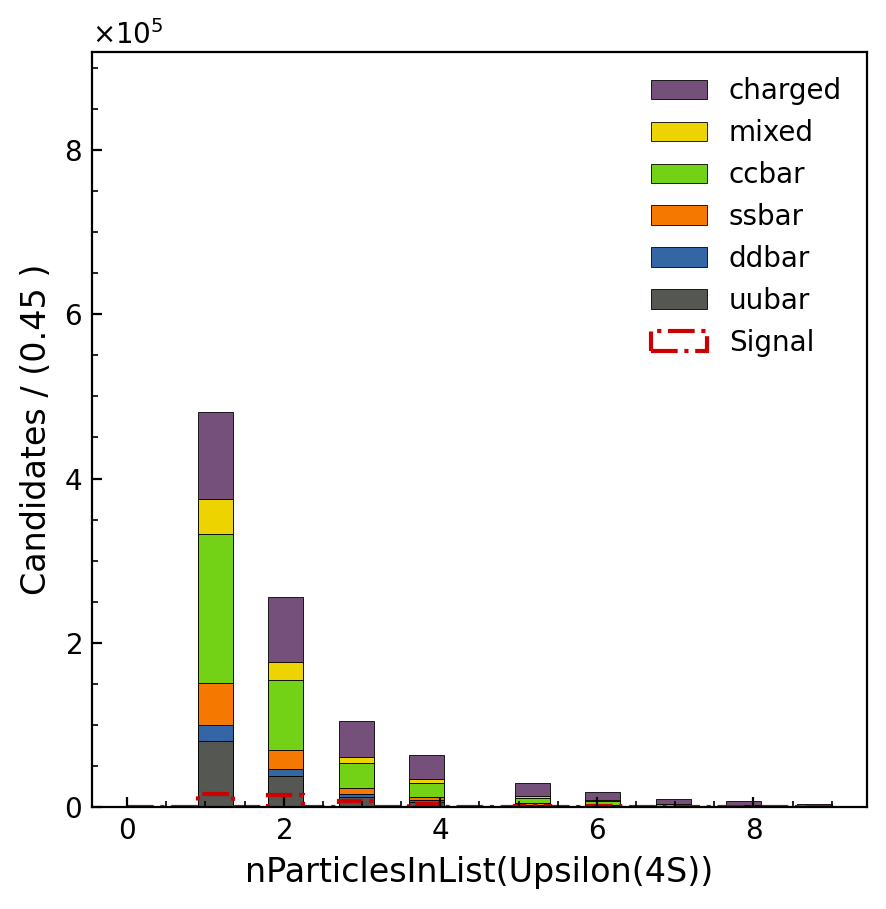

In [14]:
var1 = wg1.HistVariable("nParticlesInList__boUpsilon__bo4S__bc__claftercut__bc",
                             n_bins=20,
                             scope=(0, 9),
                             var_name="nParticlesInList(Upsilon(4S))")


hp1 = wg1.StackedHistogramPlot(var1)
hp1.add_component("uubar", uu, weights=uu.__weight__, color=TangoColors.slate,
                  comp_type='stacked')
hp1.add_component("ddbar", dd, weights=dd.__weight__, color=TangoColors.sky_blue,
                  comp_type='stacked')
hp1.add_component("ssbar", ss, weights=ss.__weight__, color=TangoColors.orange,
                  comp_type='stacked')
hp1.add_component("ccbar", cc, weights=cc.__weight__, color=TangoColors.chameleon,
                  comp_type='stacked')
#hp1.add_component("taupair", tau, weights=tau.__weight__, color=TangoColors.aluminium,
#                  comp_type='stacked')
hp1.add_component("mixed", mixed, weights=mixed.__weight__, color=TangoColors.butter,
                  comp_type='stacked')
hp1.add_component("charged", charged, weights=charged.__weight__, color=TangoColors.plum,
                  comp_type='stacked')

hp2 = wg1.SimpleHistogramPlot(var1)
hp2.add_component("Signal", sig, weights=sig.__weight__ ,
                  color=TangoColors.scarlet_red, ls='-.')

fig, ax = wg1.create_solo_figure()
hp1.plot_on(ax, ylabel="Candidates")
hp2.plot_on(ax, hide_labels=True)  # Hide labels to prevent overrides)

plt.show()
export(fig, 'combo', 'examples')
plt.close()

/afs/desy.de/user/j/jjjy213/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


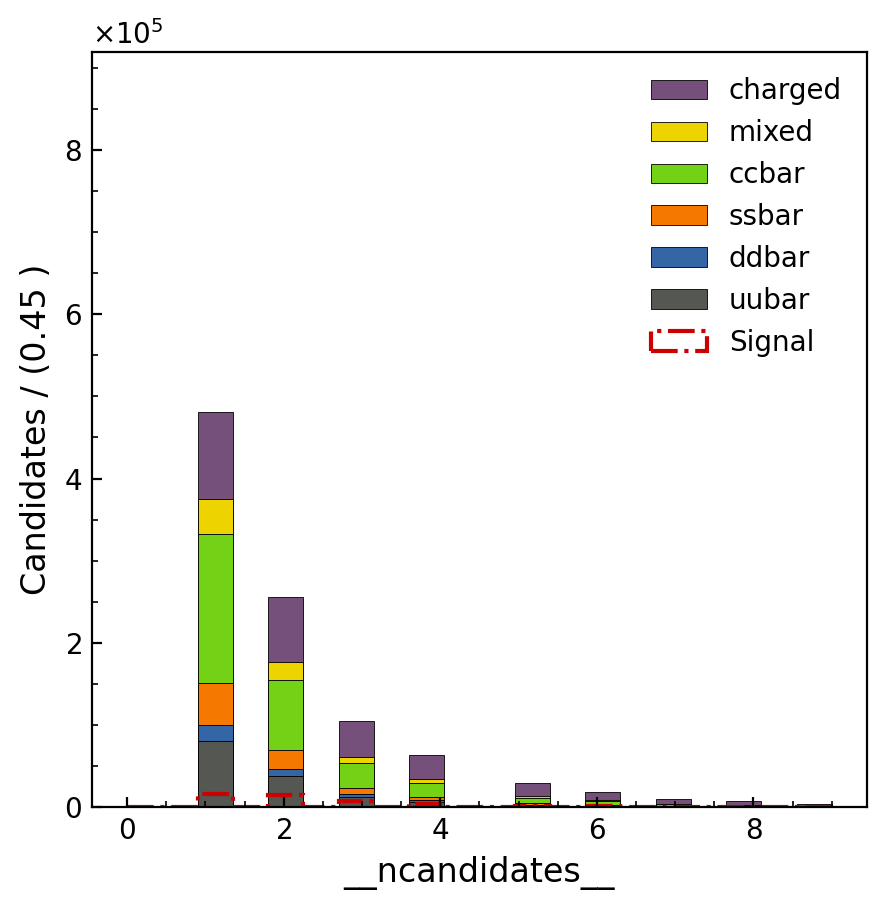

In [15]:
var1 = wg1.HistVariable("__ncandidates__",
                             n_bins=20,
                             scope=(0, 9),
                             var_name="__ncandidates__")


hp1 = wg1.StackedHistogramPlot(var1)
hp1.add_component("uubar", uu, weights=uu.__weight__, color=TangoColors.slate,
                  comp_type='stacked')
hp1.add_component("ddbar", dd, weights=dd.__weight__, color=TangoColors.sky_blue,
                  comp_type='stacked')
hp1.add_component("ssbar", ss, weights=ss.__weight__, color=TangoColors.orange,
                  comp_type='stacked')
hp1.add_component("ccbar", cc, weights=cc.__weight__, color=TangoColors.chameleon,
                  comp_type='stacked')
#hp1.add_component("taupair", tau, weights=tau.__weight__, color=TangoColors.aluminium,
#                  comp_type='stacked')
hp1.add_component("mixed", mixed, weights=mixed.__weight__, color=TangoColors.butter,
                  comp_type='stacked')
hp1.add_component("charged", charged, weights=charged.__weight__, color=TangoColors.plum,
                  comp_type='stacked')

hp2 = wg1.SimpleHistogramPlot(var1)
hp2.add_component("Signal", sig, weights=sig.__weight__ ,
                  color=TangoColors.scarlet_red, ls='-.')

fig, ax = wg1.create_solo_figure()
hp1.plot_on(ax, ylabel="Candidates")
hp2.plot_on(ax, hide_labels=True)  # Hide labels to prevent overrides)

plt.show()
export(fig, 'combo', 'examples')
plt.close()

In [16]:
idx = sig.groupby(['__event__'])['Btag_FEIProbabilityRank'].transform(min) == sig['Btag_FEIProbabilityRank']

In [17]:
sig_best= sig[idx]
sig_best

,__experiment__,__run__,__event__,__candidate__,__ncandidates__,__weight__,M,Mbc,E,p,...,Bsig_d0_roeP_cleanMask,Bsig_d0_roeMbc_cleanMask,Bsig_d0_roeDeltae_cleanMask,Bsig_d0_roeEextra_cleanMask,Bsig_d0_roeNeextra_cleanMask,Bsig_d0_nROE_Tracks_cleanMask,Bsig_d0_nROE_Charged_cleanMask,Bsig_d0_nROE_ECLClusters_cleanMask,Btag_FEIProbabilityRank,nParticlesInList__boUpsilon__bo4S__bc__claftercut__bc
0,1003,0,8478042,0,1,1.0,7.054829,4.794375,7.382884,2.176320,...,1.796264,5.277451,-0.193478,2.237117,0.887408,4.0,4.0,9.0,1.0,1.0
1,1003,0,8478233,0,1,1.0,7.364454,4.660949,7.732060,2.355752,...,1.470823,5.271229,0.532470,2.659859,1.674774,5.0,5.0,13.0,1.0,1.0
2,1003,0,8478336,0,1,1.0,5.828386,5.196189,6.247967,2.251002,...,1.171022,5.277280,-0.550210,2.182217,0.736213,4.0,4.0,11.0,1.0,1.0
3,1003,0,8478413,0,2,1.0,6.750629,4.984207,7.641897,3.581562,...,1.655407,5.275005,0.233820,3.075575,0.677810,7.0,7.0,11.0,1.0,2.0
5,1003,0,8478422,0,1,1.0,6.023686,5.143155,6.629206,2.767955,...,1.820712,5.277897,0.198332,3.353548,2.060623,5.0,5.0,13.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47279,1003,0,26549377,0,1,1.0,6.815611,5.024397,7.070163,1.880067,...,2.748134,5.187864,0.977532,3.712069,2.688976,3.0,3.0,16.0,1.0,1.0
47280,1003,0,26549388,0,2,1.0,6.646043,4.973432,7.236214,2.862325,...,1.587373,5.272010,0.526445,2.134026,0.539328,7.0,7.0,12.0,1.0,2.0
47282,1003,0,26549747,0,2,1.0,7.139828,4.776701,7.265455,1.345247,...,0.889415,5.147460,1.017490,4.824891,2.501208,4.0,4.0,17.0,1.0,2.0
47284,1003,0,26549796,0,5,1.0,7.671558,4.713420,8.737518,4.182275,...,1.917096,5.256646,0.476841,3.618187,2.081955,7.0,7.0,13.0,1.0,5.0


In [18]:
idx_bkg = bkg.groupby(['__event__'])['Btag_FEIProbabilityRank'].transform(min) == bkg['Btag_FEIProbabilityRank']

In [19]:
bkg_best = bkg[idx_bkg]
bkg_best

__experiment__  __run__  __event__  __candidate__  \
uu    0                1003        0   46560462              0   
      1                1003        0   46562529              0   
      2                1003        0   62644971              0   
      3                1003        0   62646101              0   
      4                1003        0   62646212              0   
...                     ...      ...        ...            ...   
mixed 80708            1003        0   33627198              0   
      80709            1003        0   27152291              0   
      80713            1003        0   47643788              0   
      80715            1003        0   47644837              0   
      80716            1003        0   47645444              0   

             __ncandidates__  __weight__         M       Mbc         E  \
uu    0                    1         1.0  6.590966  5.044959  7.314199   
      1                    1         1.0  6.041784  5.246125  6.215238   
      2                    1         1.0  6.717863  4.995328  7.555919   
      3                    1         1.0  6.211326  5.216326  6.757674   
      4                    1         1.0  5.826394  5.259787  6.006730   
...                      ...         ...       ...       ...       ...   
mixed 80708                1         1.0  6.273123  5.231062  6.801166   
      80709                4         1.0  6.040595  5.244435  6.395316   
      80713                2         1.0  5.736187  5.275271  6.017259   
      80715                1         1.0  6.082248  5.213829  6.424276   
      80716                2         1.0  6.644128  4.953844  7.535494   

                    p  ...  Bsig_d0_roeP_cleanMask  Bsig_d0_roeMbc_cleanMask  \
uu    0      3.171226  ...                1.915916                  5.226388   
      1      1.458094  ...                1.204444                  5.173699   
      2      3.458645  ...                2.200800                  5.252137   
      3      2.661876  ...                2.596607                  5.191792   
      4      1.460801  ...                1.434310                  5.218310   
...               ...  ...                     ...                       ...   
mixed 80708  2.627506  ...                1.954558                  5.277965   
      80709  2.100303  ...                1.470730                  5.091288   
      80713  1.817571  ...                1.742600                  5.238842   
      80715  2.068231  ...                2.285555                  5.243163   
      80716  3.555168  ...                2.373939                  5.255275   

             Bsig_d0_roeDeltae_cleanMask  Bsig_d0_roeEextra_cleanMask  \
uu    0                         0.883907                     3.672944   
      1                         1.958632                     4.221172   
      2                         1.596089                     3.507046   
      3                         1.218038                     3.039427   
      4                         2.096753                     2.662582   
...                                  ...                          ...   
mixed 80708                     1.423542                     3.932545   
      80709                     0.098226                     2.952938   
      80713                     1.762713                     5.194941   
      80715                     0.990689                     4.660039   
      80716                     1.483841                     4.591395   

             Bsig_d0_roeNeextra_cleanMask  Bsig_d0_nROE_Tracks_cleanMask  \
uu    0                          2.363199                            5.0   
      1                          2.961081                            6.0   
      2                          2.212628                            6.0   
      3                          1.724893                            6.0   
      4                          1.241616                            7.0   
...                                  

In [20]:
purity = len(sig_best) / (len(sig_best) + len(bkg_best))
purity

0.039495279323379213

In [21]:
#from root_pandas import readwrite
#sig_best.to_root("sig_best.root") # These are input file in fBDT.
#bkg_best.to_root("bkg_best.root")

In [22]:
#'Btag_d1_R2' 'Btag_d1_thrustBm' 'Btag_d1_thrustOm'
# 'Btag_d1_cosTBTO' 'Btag_d1_cosTBz' 'Btag_d1_KSFWVariables_hso00'
# 'Btag_d1_KSFWVariables_hso01' 'Btag_d1_KSFWVariables_hso02'
# 'Btag_d1_KSFWVariables_hso03' 'Btag_d1_KSFWVariables_hso04'
# 'Btag_d1_KSFWVariables_hso10' 'Btag_d1_KSFWVariables_hso12'
# 'Btag_d1_KSFWVariables_hso14' 'Btag_d1_KSFWVariables_hso20'
# 'Btag_d1_KSFWVariables_hso22' 'Btag_d1_KSFWVariables_hso24'
# 'Btag_d1_KSFWVariables_hoo0' 'Btag_d1_KSFWVariables_hoo1'
# 'Btag_d1_KSFWVariables_hoo2' 'Btag_d1_KSFWVariables_hoo3'
# 'Btag_d1_KSFWVariables_hoo4' 

In [23]:
idx_uu = uu.groupby(['__event__'])['Btag_FEIProbabilityRank'].transform(min) == uu['Btag_FEIProbabilityRank']
idx_dd = dd.groupby(['__event__'])['Btag_FEIProbabilityRank'].transform(min) == dd['Btag_FEIProbabilityRank']
idx_ss = ss.groupby(['__event__'])['Btag_FEIProbabilityRank'].transform(min) == ss['Btag_FEIProbabilityRank']
idx_cc = cc.groupby(['__event__'])['Btag_FEIProbabilityRank'].transform(min) == cc['Btag_FEIProbabilityRank']
idx_mixed = mixed.groupby(['__event__'])['Btag_FEIProbabilityRank'].transform(min) == mixed['Btag_FEIProbabilityRank']
idx_charged = charged.groupby(['__event__'])['Btag_FEIProbabilityRank'].transform(min) == charged['Btag_FEIProbabilityRank']


/afs/desy.de/user/j/jjjy213/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


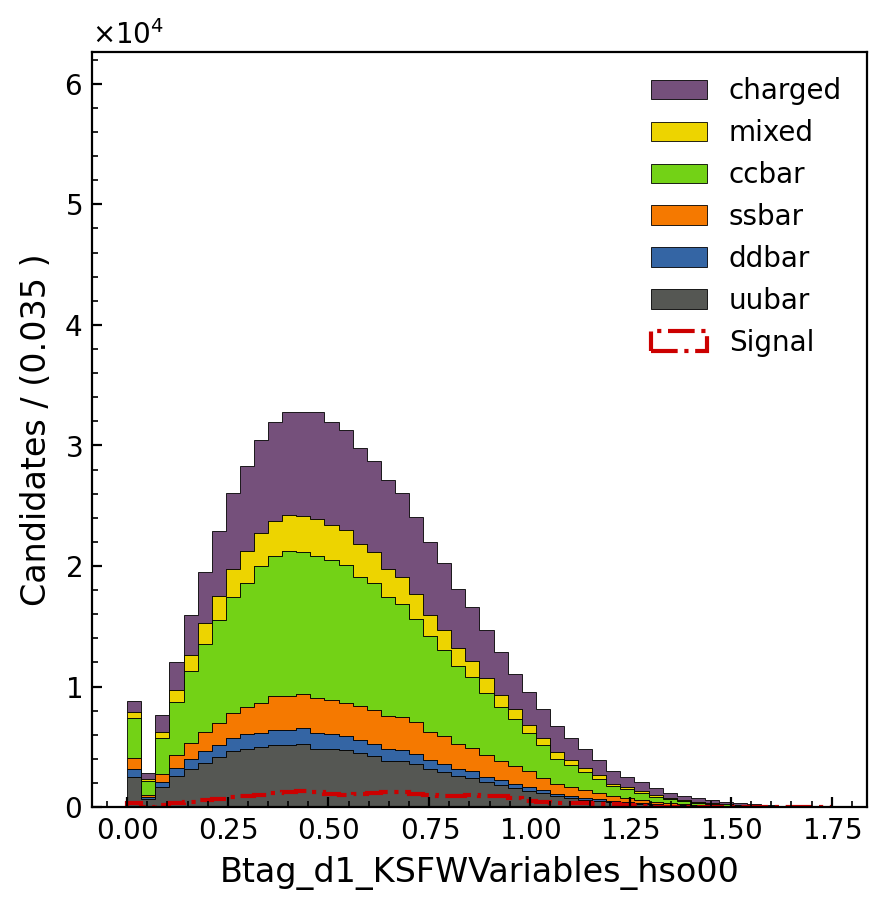

In [35]:
var1 = wg1.HistVariable("Btag_d1_KSFWVariables_hso00",
                             n_bins=50,
                             scope=(0, 1.75),
                             var_name="Btag_d1_KSFWVariables_hso00")


hp1 = wg1.StackedHistogramPlot(var1)
hp1.add_component("uubar", uu[idx_uu], weights=uu[idx_uu].__weight__, color=TangoColors.slate,
                  comp_type='stacked')
hp1.add_component("ddbar", dd[idx_dd], weights=dd[idx_dd].__weight__, color=TangoColors.sky_blue,
                  comp_type='stacked')
hp1.add_component("ssbar", ss[idx_ss], weights=ss[idx_ss].__weight__, color=TangoColors.orange,
                  comp_type='stacked')
hp1.add_component("ccbar", cc[idx_cc], weights=cc[idx_cc].__weight__, color=TangoColors.chameleon,
                  comp_type='stacked')
#hp1.add_component("taupair", tau, weights=tau.__weight__, color=TangoColors.aluminium,
#                  comp_type='stacked')
hp1.add_component("mixed", mixed[idx_mixed], weights=mixed[idx_mixed].__weight__, color=TangoColors.butter,
                  comp_type='stacked')
hp1.add_component("charged", charged[idx_charged], weights=charged[idx_charged].__weight__, color=TangoColors.plum,
                  comp_type='stacked')

hp2 = wg1.SimpleHistogramPlot(var1)
hp2.add_component("Signal", sig[idx], weights=sig[idx].__weight__,
                  color=TangoColors.scarlet_red, ls='-.')

fig, ax = wg1.create_solo_figure()
hp1.plot_on(ax, ylabel="Candidates")
hp2.plot_on(ax, hide_labels=True)  # Hide labels to prevent overrides)

plt.show()
export(fig, 'combo', 'examples')
plt.close()